In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix,roc_curve,auc,roc_auc_score,accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

from sklearn.ensemble import RandomForestClassifier

r = RandomForestClassifier() 

from sklearn.tree import DecisionTreeClassifier

d = DecisionTreeClassifier()

from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

from sklearn.neighbors import KNeighborsClassifier

k = KNeighborsClassifier()

from sklearn.naive_bayes import GaussianNB

from sklearn.naive_bayes import BernoulliNB

g = GaussianNB()

b = BernoulliNB()

from xgboost import XGBClassifier

xgbc = XGBClassifier()

In [31]:
import pandas as pd

In [32]:
df = pd.read_csv("framingham.csv")

In [33]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [35]:
df = df.dropna(subset =["heartRate"] )

In [36]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            0
glucose            388
TenYearCHD           0
dtype: int64

In [37]:
df["education"].value_counts()

1.0    1719
2.0    1253
3.0     687
4.0     473
Name: education, dtype: int64

In [38]:
df_null = df[df["education"].isnull()]
df_notnull = df[df["education"].notnull()]


In [39]:
df_null.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
33,1,61,NaN,1,5.0,0.0,0,0,0,175.0,134.0,82.5,18.59,72.0,75.0,1
36,1,56,NaN,0,0.0,0.0,0,0,0,257.0,153.5,102.0,28.09,72.0,75.0,0
72,0,37,NaN,0,0.0,0.0,0,0,0,200.0,119.0,79.0,33.29,67.0,87.0,0
184,1,67,NaN,0,0.0,0.0,0,0,0,257.0,125.0,67.5,25.95,65.0,69.0,0
213,0,34,NaN,0,0.0,0.0,0,0,0,163.0,107.0,71.0,23.88,73.0,80.0,0


In [40]:
abs(df.corr()["education"]).sort_values(ascending = False) 

education          1.000000
age                0.165566
BMI                0.137331
sysBP              0.129275
prevalentHyp       0.081655
diaBP              0.062480
heartRate          0.054206
TenYearCHD         0.053552
diabetes           0.038722
glucose            0.035630
prevalentStroke    0.035135
totChol            0.023212
currentSmoker      0.018771
male               0.017626
BPMeds             0.010857
cigsPerDay         0.008262
Name: education, dtype: float64

In [41]:
x_train , y_train , x_test , y_test = df_notnull[["age" , "sysBP"  ]] , df_notnull["education"] , df_null[["age" , "sysBP" ]] , df_null[["education"]]

In [42]:
r.fit(x_train,y_train)
tahmin = r.predict(x_test)

In [43]:
df_null["education"] = tahmin
df["education"].loc[df["education"].isnull()] = df_null["education"]

c:\Users\oztur\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
df.isnull().sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            0
glucose            388
TenYearCHD           0
dtype: int64

In [45]:
df["cigsPerDay"].value_counts()

0.0     2144
20.0     734
30.0     217
15.0     210
10.0     143
9.0      130
5.0      121
3.0      100
40.0      80
1.0       67
43.0      56
25.0      55
35.0      22
2.0       18
6.0       18
7.0       12
8.0       11
60.0      11
4.0        9
17.0       7
18.0       7
50.0       6
23.0       6
11.0       5
45.0       3
13.0       3
12.0       3
16.0       3
14.0       2
19.0       2
38.0       1
29.0       1
70.0       1
Name: cigsPerDay, dtype: int64

In [47]:
df["cigsPerDay"].fillna(0 , inplace=True)

In [48]:
df["BPMeds"].value_counts()

0.0    4060
1.0     124
Name: BPMeds, dtype: int64

In [49]:
df["BPMeds"].fillna(0 , inplace=True)

In [50]:
df["totChol"].value_counts()

240.0    85
220.0    70
260.0    62
210.0    61
232.0    59
         ..
392.0     1
405.0     1
359.0     1
398.0     1
119.0     1
Name: totChol, Length: 248, dtype: int64

In [51]:
mean_value=df['totChol'].mean()
df['totChol'].fillna(value=mean_value, inplace=True)

In [52]:
df["BMI"].value_counts()

23.48    18
22.19    18
22.91    18
22.54    18
25.09    16
         ..
34.13     1
23.21     1
29.13     1
19.87     1
43.67     1
Name: BMI, Length: 1363, dtype: int64

In [53]:
mean_value=df['BMI'].mean()
df['BMI'].fillna(value=mean_value, inplace=True)

In [54]:
df["glucose"].value_counts()

75.0     193
77.0     167
73.0     156
80.0     152
70.0     152
        ... 
386.0      1
155.0      1
147.0      1
205.0      1
260.0      1
Name: glucose, Length: 143, dtype: int64

In [56]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()

In [57]:
abs(df.corr()["glucose"]).sort_values(ascending = False) 

glucose            1.000000
diabetes           0.617657
sysBP              0.140506
TenYearCHD         0.125406
age                0.122139
heartRate          0.094500
prevalentHyp       0.086715
BMI                0.086346
diaBP              0.061301
cigsPerDay         0.059553
currentSmoker      0.056935
BPMeds             0.050982
totChol            0.046414
education          0.034603
prevalentStroke    0.018439
male               0.005974
Name: glucose, dtype: float64

In [58]:
df_null = df[df["glucose"].isnull()]
df_notnull = df[df["glucose"].notnull()]


In [59]:
x_train , y_train , x_test , y_test = df_notnull[["diabetes" , "TenYearCHD" ,"age" ]] , df_notnull["glucose"] , df_null[["diabetes" , "TenYearCHD" ,"age" ]] , df_null[["glucose"]]

In [60]:
gbr.fit(x_train,y_train)
tahmin = gbr.predict(x_test)

In [61]:
df_null["glucose"] = tahmin
df["glucose"].loc[df["glucose"].isnull()] = df_null["glucose"]

c:\Users\oztur\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [63]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [64]:
df["male"] = df["male"].astype("category")

In [68]:
df["TenYearCHD"].value_counts()

0    3594
1     643
Name: TenYearCHD, dtype: int64

In [70]:
abs(df.corr()["TenYearCHD"]).sort_values(ascending = False)

TenYearCHD         1.000000
age                0.224541
sysBP              0.215640
prevalentHyp       0.176935
diaBP              0.145772
glucose            0.127912
diabetes           0.097472
BPMeds             0.086571
totChol            0.081903
BMI                0.074257
prevalentStroke    0.061894
cigsPerDay         0.058477
education          0.054744
heartRate          0.022913
currentSmoker      0.018907
Name: TenYearCHD, dtype: float64

In [75]:
df_model = df[["TenYearCHD","age","sysBP","prevalentHyp","diaBP"]]

In [76]:
import numpy as np

In [77]:
from pycaret.classification import *

exp_name = setup(data = df_model , target = "TenYearCHD")

best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8496,0.7066,0.0288,0.5267,0.0540,0.0415,0.0964,0.4760
ridge,Ridge Classifier,0.8489,0.0000,0.0067,0.3000,0.0130,0.0111,0.0413,0.0050
dummy,Dummy Classifier,0.8479,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0040
lda,Linear Discriminant Analysis,0.8435,0.7053,0.0466,0.4025,0.0823,0.0514,0.0897,0.0060
ada,Ada Boost Classifier,0.8425,0.6706,0.0155,0.2983,0.0290,0.0104,0.0298,0.0340
gbc,Gradient Boosting Classifier,0.8422,0.6752,0.0288,0.2688,0.0516,0.0264,0.0451,0.0460
qda,Quadratic Discriminant Analysis,0.8320,0.6913,0.1286,0.3500,0.1871,0.1165,0.1346,0.0060
lightgbm,Light Gradient Boosting Machine,0.8273,0.6268,0.0752,0.2705,0.1171,0.0532,0.0677,0.0240
xgboost,Extreme Gradient Boosting,0.8260,0.6162,0.1042,0.3008,0.1540,0.0814,0.0964,0.0630
rf,Random Forest Classifier,0.8256,0.6049,0.1108,0.3079,0.1620,0.0876,0.1028,0.1980


In [79]:
x_train,x_test,y_train,y_test = train_test_split(df.drop("TenYearCHD",axis=1),df["TenYearCHD"],test_size=0.2,random_state=0)

In [86]:
log.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
y_pred = log.predict(x_test)

In [82]:
print(f'Accuracy Score : {accuracy_score(y_test,y_pred)}')

Accuracy Score : 0.8655660377358491


In [87]:
probs = log.predict_proba(x_test)
probs = probs[:,1]
y_pred = log.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test,probs)

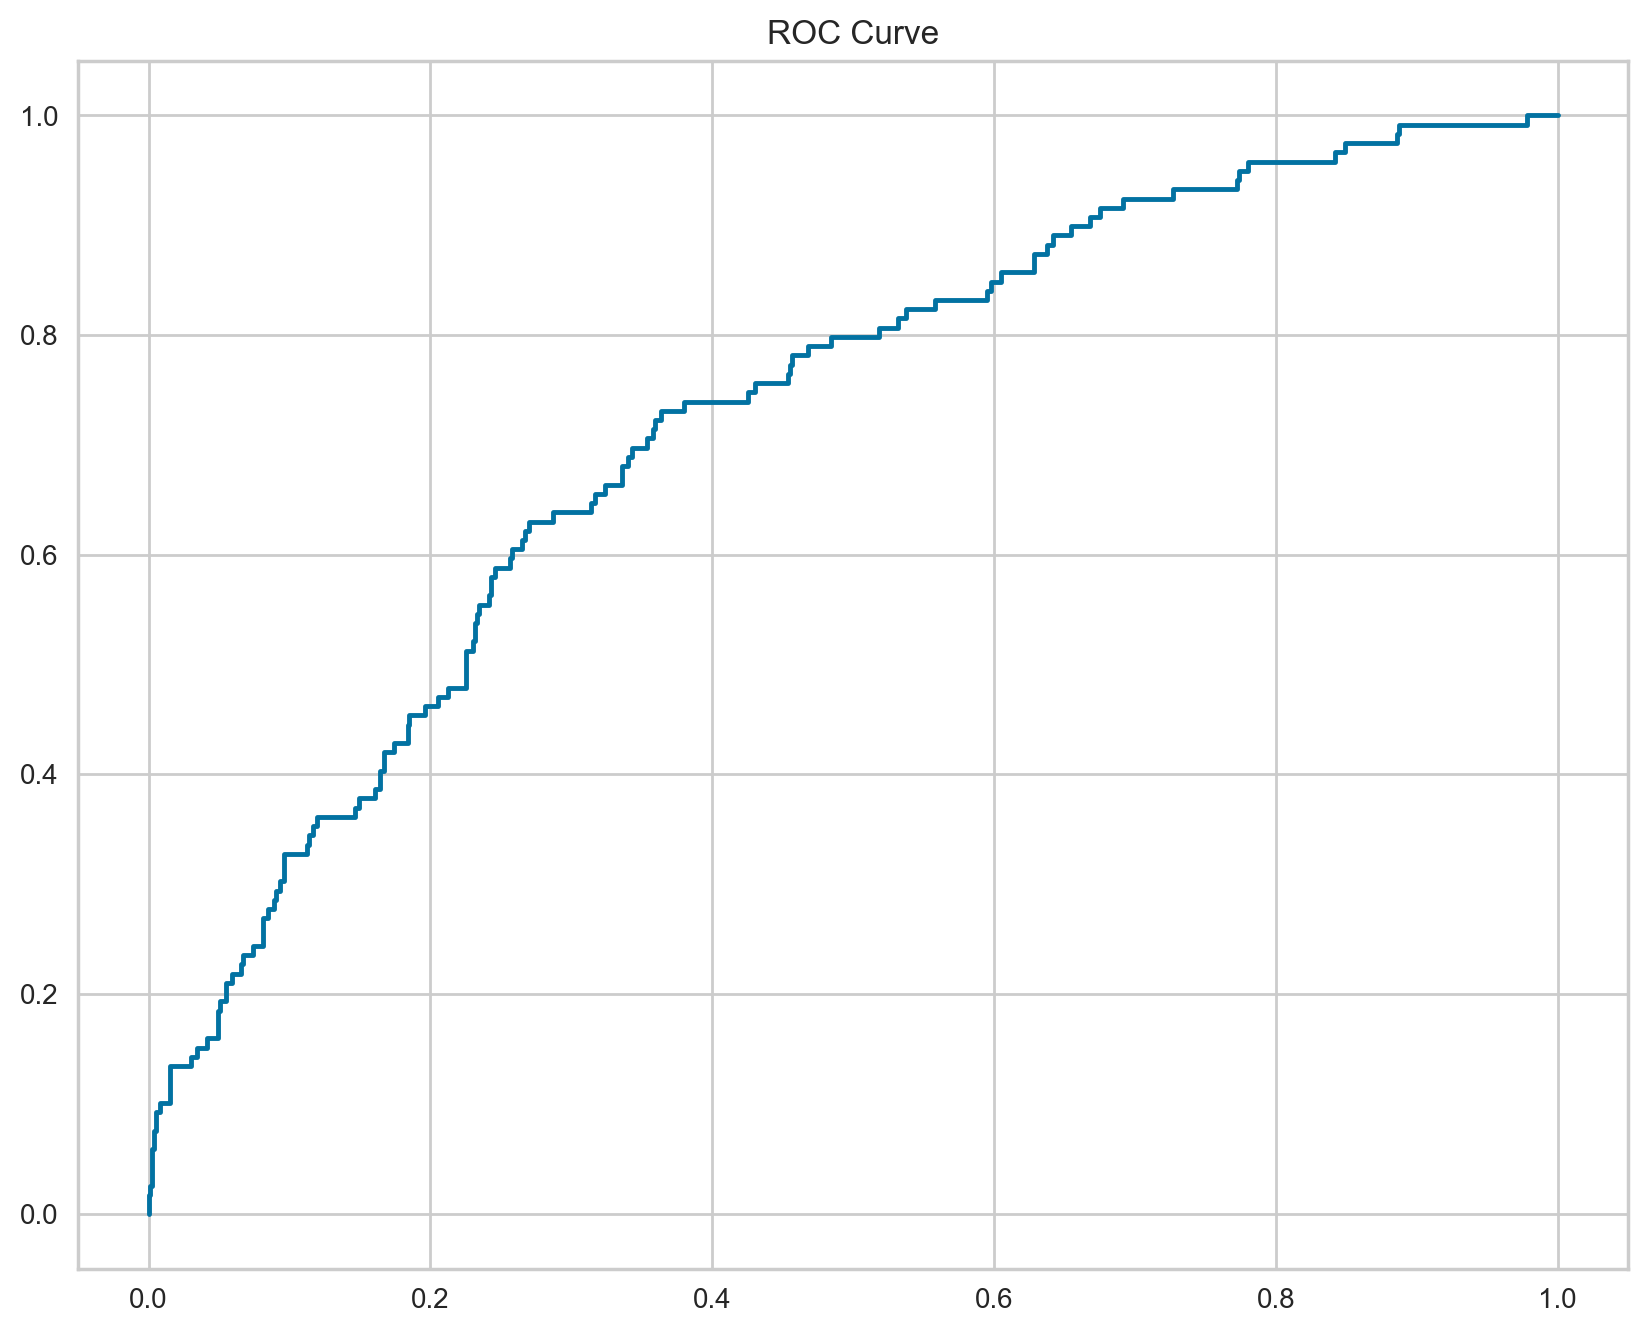

In [93]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10,8), dpi=200)

plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.show()